# ML2: K-Means

By: Ravi

## Importing the libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

## Importing the dataset

In [31]:
dataset = pd.read_csv('./Customers.csv')
df = pd.DataFrame(dataset)

## Clean Dataset

In [32]:
# Replace the missing values with mode
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])

# Remove outliars
df = df.drop(df[df['Work Experience'] == 17].index)

# creating an instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing it in another column called "Gender_Code"
df["Gender_Code"] = labelencoder.fit_transform(df["Gender"])

# Assigning numerical values and storing it in another column called "Profession_Code"
df["Profession_Code"] = labelencoder.fit_transform(df["Profession"])

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df[['Spending Score (1-100)','Annual Income ($)']]=scaler.fit_transform(df[['Spending Score (1-100)','Annual Income ($)']])

c:\Users\rrwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rrwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rrwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\rrwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

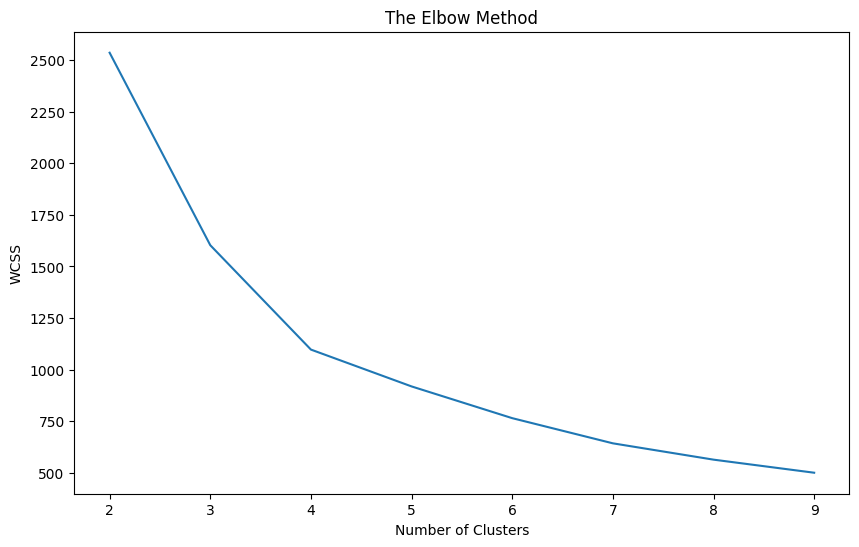

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(df[['Spending Score (1-100)','Annual Income ($)']])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(22,6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

c:\Users\rrwal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


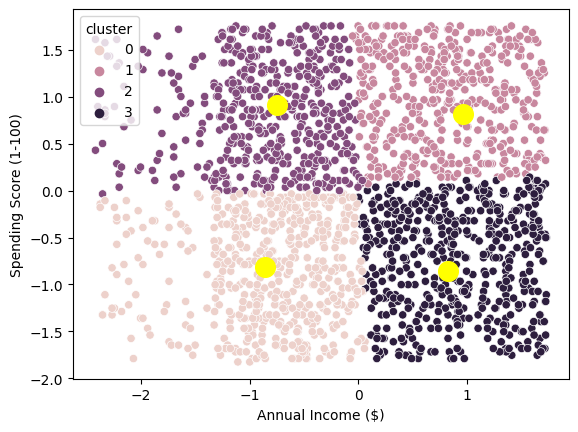

In [39]:
k_means=KMeans(n_clusters=4)
k_means.fit(df[['Spending Score (1-100)','Annual Income ($)']])
df['cluster']=k_means.labels_
sns.scatterplot(x = df['Annual Income ($)'],y = df['Spending Score (1-100)'],hue=df['cluster'])
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')